
Epoch 00001: val_loss improved from inf to 0.05700, saving model to ../model/16/01_0.0570.hdf5

Epoch 00002: val_loss improved from 0.05700 to 0.04298, saving model to ../model/16/02_0.0430.hdf5

Epoch 00003: val_loss improved from 0.04298 to 0.03592, saving model to ../model/16/03_0.0359.hdf5

Epoch 00004: val_loss improved from 0.03592 to 0.03347, saving model to ../model/16/04_0.0335.hdf5

Epoch 00005: val_loss improved from 0.03347 to 0.02834, saving model to ../model/16/05_0.0283.hdf5

Epoch 00006: val_loss improved from 0.02834 to 0.02710, saving model to ../model/16/06_0.0271.hdf5

Epoch 00007: val_loss improved from 0.02710 to 0.02565, saving model to ../model/16/07_0.0257.hdf5

Epoch 00008: val_loss did not improve from 0.02565

Epoch 00009: val_loss did not improve from 0.02565

Epoch 00010: val_loss did not improve from 0.02565

Epoch 00011: val_loss did not improve from 0.02565

Epoch 00012: val_loss did not improve from 0.02565

Epoch 00013: val_loss did not improve from 

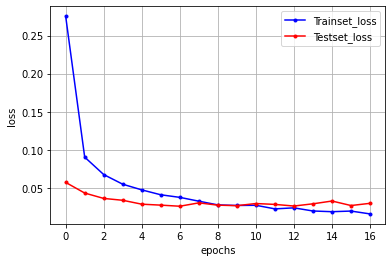

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


# 컨볼루션[합성곱] 신경망(CNN)
# 입력된 이미지에서 다시 한번 특징 추출 위해 마스크(필터, 윈도 또는 커널)를 도입하는 기법
# 컨볼루션 층 추가 함수 : Conv2D()
    # 첫번째 인자 : 마스크 몇개 적용
    # 두번째 인자 : 마스크(커널) 크기 설정, kernel_size=(행, 열)
    # 세번째 인자 : Dense 층과 마찬가지로 맨 처음 층에 입력되는 값 설정, input_shape(행, 열, 색상[3] 또는 흑백[1])
    # 네번째 인자 : 활성화 함수 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# 맥스 풀링 : 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지 제외
# pool_size : 풀링 창 크기 정하는 것, 2로 정하면 전체 크기 절반으로 줄어듬
model.add(MaxPooling2D(pool_size=2))

# 드롭 아웃 : 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
# 플래튼 : 1차원 배열 변환
# 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다루므로, Dense()함수를 이용하기 위해서는 1차원 배열로 변환해야함
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


MODEL_DIR = '../model/16/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)   

modelpath = '../model/16/{epoch:02d}_{val_loss:.4f}.hdf5'


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callbacks = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=30, batch_size=200, verbose=0,
                 callbacks=[early_stopping_callbacks, checkpointer]
)

print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))


y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
